Single Attribute

Linear Regression (Single Attribute):
Train MSE: 1.3618586756930053
Test MSE: 1.3885595634666783
Train RMSE: 1.1669870075082265
Test RMSE: 1.1783715727505812
Train MAPE: 142324572671023.0
Test MAPE: 60703281590984.914
Train R²: 0.0052754335314767475
Test R²: -0.00881950367199047

Classification (Single Attribute):
First 5 Predictions (Train): [0 0 0 0 0]
First 5 Predictions (Test): [0 0 0 0 0]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       681
           1       0.00      0.00      0.00       219

    accuracy                           0.76       900
   macro avg       0.38      0.50      0.43       900
weighted avg       0.57      0.76      0.65       900


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       181
           1       0.00      0.00      0.00        45

    accuracy                   

C:\Users\Admin\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\myenv\Lib\site-packages\sklearn\metri


Linear Regression (Multiple Attributes):
Train MSE: 0.3445174376143939
Test MSE: 1.8349981045634964
Train RMSE: 0.5869560780964739
Test RMSE: 1.3546210187958463
Train MAPE: 24193396989073.82
Test MAPE: 12819173071682.21
Train R²: 0.7483586477154571
Test R²: -0.33316706448164757

Classification (Multiple Attributes):
First 5 Predictions (Train): [0 0 0 0 0]
First 5 Predictions (Test): [0 1 0 0 1]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       681
           1       0.85      0.48      0.62       219

    accuracy                           0.85       900
   macro avg       0.85      0.73      0.76       900
weighted avg       0.85      0.85      0.84       900


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       181
           1       0.61      0.49      0.54        45

    accuracy                           0.84   

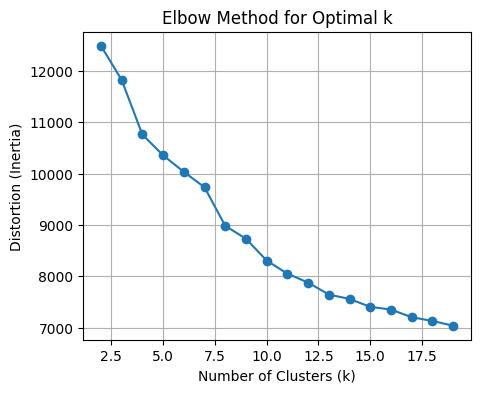

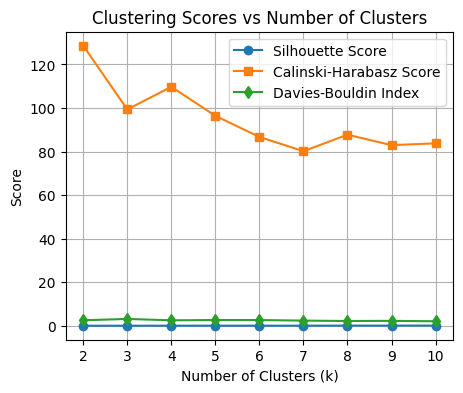

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

def a1(file):
    df = pd.read_excel(file)
    X = df[['embed_0']]
    y = df['output']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred_reg = reg.predict(X_train)
    y_test_pred_reg = reg.predict(X_test)
    
    y_train_class = y_train.apply(lambda x: 1 if x > 4 else 0)
    y_test_class = y_test.apply(lambda x: 1 if x > 4 else 0)
    clf = LogisticRegression().fit(X_train, y_train_class)
    y_train_pred_clf = clf.predict(X_train)
    y_test_pred_clf = clf.predict(X_test)
    
    return {
        "reg_model": reg,
        "X_train": X_train, "X_test": X_test,
        "y_train": y_train, "y_test": y_test,
        "y_train_pred_reg": y_train_pred_reg, "y_test_pred_reg": y_test_pred_reg,
        "clf_model": clf,
        "y_train_class": y_train_class, "y_test_class": y_test_class,
        "y_train_pred_clf": y_train_pred_clf, "y_test_pred_clf": y_test_pred_clf
    }

def a2(results):
    mse_train = mean_squared_error(results["y_train"], results["y_train_pred_reg"])
    mse_test = mean_squared_error(results["y_test"], results["y_test_pred_reg"])
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mape_train = mean_absolute_percentage_error(results["y_train"], results["y_train_pred_reg"])
    mape_test = mean_absolute_percentage_error(results["y_test"], results["y_test_pred_reg"])
    r2_train = r2_score(results["y_train"], results["y_train_pred_reg"])
    r2_test = r2_score(results["y_test"], results["y_test_pred_reg"])

    return {
        "mse_train": mse_train, "mse_test": mse_test,
        "rmse_train": rmse_train, "rmse_test": rmse_test,
        "mape_train": mape_train, "mape_test": mape_test,
        "r2_train": r2_train, "r2_test": r2_test
    }

def a3(file):
    df = pd.read_excel(file)
    X = df.drop(columns=['output'])
    y = df['output']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred_reg = reg.predict(X_train)
    y_test_pred_reg = reg.predict(X_test)
    
    y_train_class = y_train.apply(lambda x: 1 if x > 4 else 0)
    y_test_class = y_test.apply(lambda x: 1 if x > 4 else 0)
    clf = LogisticRegression().fit(X_train, y_train_class)
    y_train_pred_clf = clf.predict(X_train)
    y_test_pred_clf = clf.predict(X_test)
    
    results = {
        "reg_model": reg,
        "X_train": X_train, "X_test": X_test,
        "y_train": y_train, "y_test": y_test,
        "y_train_pred_reg": y_train_pred_reg, "y_test_pred_reg": y_test_pred_reg,
        "clf_model": clf,
        "y_train_class": y_train_class, "y_test_class": y_test_class,
        "y_train_pred_clf": y_train_pred_clf, "y_test_pred_clf": y_test_pred_clf
    }
    
    metrics = a2(results)
    
    return results, metrics

def a4(file):
    df = pd.read_excel(file)
    X = df.drop(columns=['output'])
    
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
    
    return kmeans.labels_, kmeans.cluster_centers_, X

def a5(X, labels):
    silhouette = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    
    return {
        "silhouette_score": silhouette,
        "calinski_harabasz_score": ch_score,
        "davies_bouldin_index": db_index
    }

def a6(file, max_k=10):
    df = pd.read_excel(file)
    X = df.drop(columns=['output'])

    silhouette_scores = []
    ch_scores = []
    db_indices = []
    
    k_values = range(2, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
        labels = kmeans.labels_
        
        silhouette_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
        db_indices.append(davies_bouldin_score(X, labels))
    
    plt.figure(figsize=(5, 4))  # Smaller size
    plt.plot(k_values, silhouette_scores, label="Silhouette Score", marker='o')
    plt.plot(k_values, ch_scores, label="Calinski-Harabasz Score", marker='s')
    plt.plot(k_values, db_indices, label="Davies-Bouldin Index", marker='d')
    
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Score")
    plt.title("Clustering Scores vs Number of Clusters")
    plt.legend()
    plt.grid(True)
    plt.show()

def a7(file):
    df = pd.read_excel(file)
    X = df.drop(columns=['output'])

    distortions = []
    
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(5, 4))  # Smaller size
    plt.plot(range(2, 20), distortions, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    plt.show()

def main():
    file = r"C:\Users\Admin\Downloads\training_mathbert 4.xlsx"
    
    print("Single Attribute")
    results = a1(file)
    metrics = a2(results)
    
    print("\nLinear Regression (Single Attribute):")
    print(f"Train MSE: {metrics['mse_train']}")
    print(f"Test MSE: {metrics['mse_test']}")
    print(f"Train RMSE: {metrics['rmse_train']}")
    print(f"Test RMSE: {metrics['rmse_test']}")
    print(f"Train MAPE: {metrics['mape_train']}")
    print(f"Test MAPE: {metrics['mape_test']}")
    print(f"Train R²: {metrics['r2_train']}")
    print(f"Test R²: {metrics['r2_test']}")
    
    print("\nClassification (Single Attribute):")
    print(f"First 5 Predictions (Train): {results['y_train_pred_clf'][:5]}")
    print(f"First 5 Predictions (Test): {results['y_test_pred_clf'][:5]}")
    print("\nClassification Report (Train):")
    print(classification_report(results["y_train_class"], results["y_train_pred_clf"]))
    print("\nClassification Report (Test):")
    print(classification_report(results["y_test_class"], results["y_test_pred_clf"]))
    
    print("\nMultiple Attributes")
    results, metrics = a3(file)
    
    print("\nLinear Regression (Multiple Attributes):")
    print(f"Train MSE: {metrics['mse_train']}")
    print(f"Test MSE: {metrics['mse_test']}")
    print(f"Train RMSE: {metrics['rmse_train']}")
    print(f"Test RMSE: {metrics['rmse_test']}")
    print(f"Train MAPE: {metrics['mape_train']}")
    print(f"Test MAPE: {metrics['mape_test']}")
    print(f"Train R²: {metrics['r2_train']}")
    print(f"Test R²: {metrics['r2_test']}")
    
    print("\nClassification (Multiple Attributes):")
    print(f"First 5 Predictions (Train): {results['y_train_pred_clf'][:5]}")
    print(f"First 5 Predictions (Test): {results['y_test_pred_clf'][:5]}")
    print("\nClassification Report (Train):")
    print(classification_report(results["y_train_class"], results["y_train_pred_clf"]))
    print("\nClassification Report (Test):")
    print(classification_report(results["y_test_class"], results["y_test_pred_clf"]))
    
    print("\nClustering")
    labels, centers, X = a4(file)
    
    print("\nClustering Metrics:")
    metrics = a5(X, labels)
    print(f"Silhouette Score: {metrics['silhouette_score']}")
    print(f"Calinski-Harabasz Score: {metrics['calinski_harabasz_score']}")
    print(f"Davies-Bouldin Index: {metrics['davies_bouldin_index']}")
    a7(file)
    a6(file)
   

if __name__ == "__main__":
    main()
